# Pre-process

In [74]:
#read file, add three columns and clean
import pandas as pd
us_df6=pd.read_csv("us_df6.csv",header=0,encoding = 'unicode_escape')
us_df7=us_df6.drop(['Unnamed: 0','X','video_id.1'],axis=1)
us_df7['like_res_rate']=us_df7['likes']/us_df7['views']
us_df7['comment_res_rate']=us_df7['comment_count']/us_df7['views']
us_df7['publish_time'] = pd.to_datetime(us_df7['publish_time'], format='%Y-%m-%dT%H:%M:%S')
us_df7['p_hour']=us_df7['publish_time'].dt.hour
us_df8=us_df7.rename(columns={'offici':'official','movi':'movie'})
us_df8['title_length'] = us_df8['title'].str.split().str.len()
new_order=['video_id', 'title', 'title_length','channel_title', 'category_id', 'category_name',
       'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'last_trending',
       'publish_time', 'p_year', 'p_month', 'p_weekday', 'p_time', 'p_hour','views',
       'likes', 'dislikes', 'like_rate', 'comment_count', 'appearances', 'war',
       'day', 'game', 'first', 'official', 'video', 'make', 'audio', 'makeup',
       'movie', 'show', 'trailer', 'live', 'star', 'new', 'music', 'get',
       'tri', 'like_res_rate', 'comment_res_rate']
us_df9=us_df8.reindex(columns=new_order)

In [77]:
us_df9['new_category_id'], _ = pd.factorize(us_df9['category_id'], sort=True)
us_df9['new_p_year'], _ = pd.factorize(us_df9['p_year'], sort=True)
us_df9['new_p_month'], _ = pd.factorize(us_df9['p_month'], sort=True)
us_df9['new_p_weekday'], _ = pd.factorize(us_df9['p_weekday'], sort=True)
us_df9['new_p_hour'], _ = pd.factorize(us_df9['p_hour'], sort=True)

In [78]:
us_df9.shape

(6254, 50)

# Modeling

In [79]:
#split dataset in features and target variable
import numpy as np
x = us_df9[['new_category_id','comments_disabled','new_p_month','new_p_weekday','new_p_hour','war','day', 'game', 'first', 'official', 'video', 'make', 'audio', 'makeup',
       'movie', 'show', 'trailer', 'live', 'star', 'new', 'music', 'get','tri', 'title_length']]# Features
y = np.log(us_df9['views']) # Features

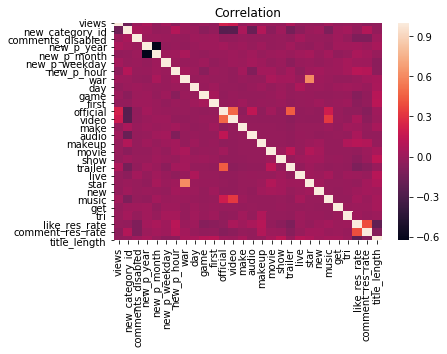

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
df_test=us_df9[['views','new_category_id','comments_disabled','new_p_year','new_p_month','new_p_weekday','new_p_hour','war','day', 'game', 'first', 'official', 'video', 'make', 'audio', 'makeup',
       'movie', 'show', 'trailer', 'live', 'star', 'new', 'music', 'get',
       'tri', 'like_res_rate', 'comment_res_rate','title_length']]
corr=df_test.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.title('Correlation')
plt.show()

## Model1: linear regression

In [81]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.4,random_state=1)

In [82]:
from sklearn import linear_model,metrics
reg=linear_model.LinearRegression()

In [83]:
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
reg.score(train_x,train_y)

0.08287435336618376

In [93]:
reg.coef_

array([-5.11300554e-02, -1.46955720e-01, -5.27532124e-02,  4.33364293e-02,
       -5.79549661e-03,  7.52545692e-01,  8.81778835e-02,  3.42256264e-01,
        6.94584189e-05,  5.17145397e-01,  7.82060118e-01,  8.71287742e-02,
        2.99962092e-01,  3.20952477e-01, -4.99468254e-01, -1.22489875e-01,
        5.67294624e-01, -6.95114491e-02, -5.45562138e-01, -3.64933250e-01,
       -1.19112633e-01, -7.20103713e-03,  7.53983448e-01, -2.51644221e-02])

In [95]:
x.columns

Index(['new_category_id', 'comments_disabled', 'new_p_month', 'new_p_weekday',
       'new_p_hour', 'war', 'day', 'game', 'first', 'official', 'video',
       'make', 'audio', 'makeup', 'movie', 'show', 'trailer', 'live', 'star',
       'new', 'music', 'get', 'tri', 'title_length'],
      dtype='object')

In [86]:
reg.intercept_

13.69051130285218

In [87]:
pred_y = reg.predict(test_x)

In [88]:
reg_results = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})
reg_results

,Actual,Predicted
1163,8.899048,12.937581
2743,17.506582,14.217841
4627,13.354974,13.074833
5776,11.755118,12.400165
4950,14.772710,13.237671
...,...,...
3544,12.426095,12.630022
279,14.626931,12.559922
4566,14.623321,13.229908
2961,15.261110,13.012109


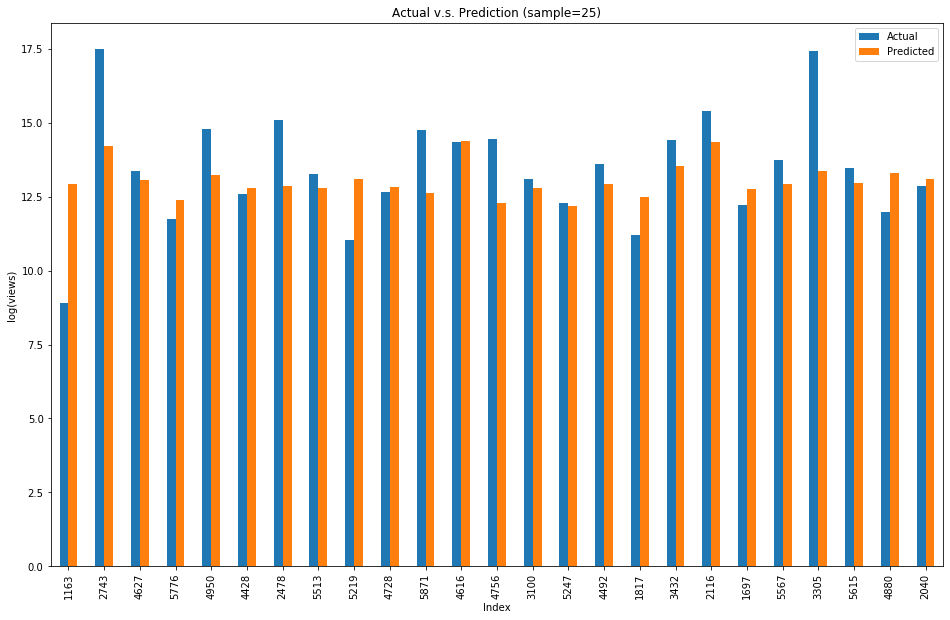

In [89]:
df = reg_results.head(25)
df.plot(kind='bar',figsize=(16,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.title('Actual v.s. Prediction (sample=25)')
plt.xlabel('Index')
plt.ylabel('log(views)')
plt.show()

In [90]:
test_y

1163     8.899048
2743    17.506582
4627    13.354974
5776    11.755118
4950    14.772710
          ...    
3544    12.426095
279     14.626931
4566    14.623321
2961    15.261110
1939    11.784234
Name: views, Length: 2502, dtype: float64

In [91]:
import sklearn.metrics as metrics
def regression_results(test_y, pred_y):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(test_y, pred_y)
    mean_absolute_error=metrics.mean_absolute_error(test_y, pred_y) 
    mse=metrics.mean_squared_error(test_y, pred_y) 
    mean_squared_log_error=metrics.mean_squared_log_error(test_y, pred_y)
    median_absolute_error=metrics.median_absolute_error(test_y, pred_y)
    r2=metrics.r2_score(test_y, pred_y)
    
    print('Out of sample prediction results are:')
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('R^2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [49]:
regression_results(test_y,pred_y)

Out of sample prediction results are:
explained_variance:  0.1202
mean_squared_log_error:  0.0178
R^2:  0.1197
MAE:  1.3451
MSE:  3.0511
RMSE:  1.7467


## Model2: decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

In [86]:
score=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    score.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0


In [87]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')